# Importing the Dependencies

For Data Manipulation and Pre-Processing

In [1]:
import pandas as pd
import numpy as np

For Data Visualization

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

For Machine  Learning

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix

### Data Exploration

In [4]:
df = pd.read_csv('/content/predictive_maintenance.csv')

In [5]:
df.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target,Failure Type
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,No Failure
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,No Failure
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,No Failure
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,No Failure
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,No Failure


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Target                   10000 non-null  int64  
 9   Failure Type             10000 non-null  object 
dtypes: float64(3), int64(4), object(3)
memory usage: 781.4+ KB


In [7]:
df.isnull().sum()

,0
UDI,0
Product ID,0
Type,0
Air temperature [K],0
Process temperature [K],0
Rotational speed [rpm],0
Torque [Nm],0
Tool wear [min],0
Target,0
Failure Type,0


In [8]:
df.describe()

,UDI,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Target
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,300.004930,310.005560,1538.776100,39.986910,107.951000,0.033900
std,2886.89568,2.000259,1.483734,179.284096,9.968934,63.654147,0.180981
min,1.00000,295.300000,305.700000,1168.000000,3.800000,0.000000,0.000000
25%,2500.75000,298.300000,308.800000,1423.000000,33.200000,53.000000,0.000000
50%,5000.50000,300.100000,310.100000,1503.000000,40.100000,108.000000,0.000000
75%,7500.25000,301.500000,311.100000,1612.000000,46.800000,162.000000,0.000000
max,10000.00000,304.500000,313.800000,2886.000000,76.600000,253.000000,1.000000


In [9]:
# Looking for unique values
print(df.nunique())

UDI                        10000
Product ID                 10000
Type                           3
Air temperature [K]           93
Process temperature [K]       82
Rotational speed [rpm]       941
Torque [Nm]                  577
Tool wear [min]              246
Target                         2
Failure Type                   6
dtype: int64


In [10]:
df.shape

(10000, 10)

### Data Visualization

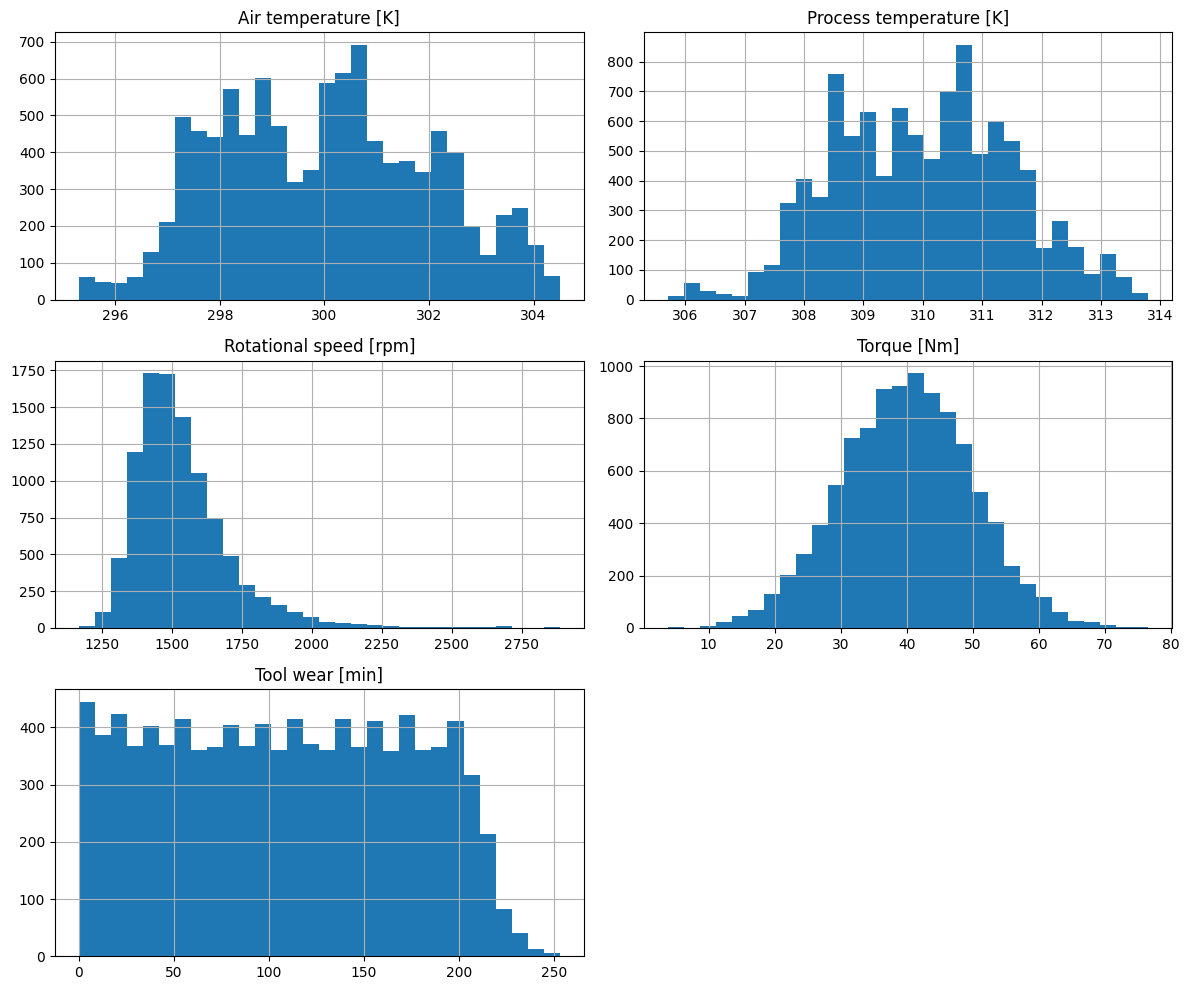

In [11]:
# Histograms for numerical features
numerical_columns = ['Air temperature [K]', 'Process temperature [K]',
                     'Rotational speed [rpm]', 'Torque [Nm]',
                     'Tool wear [min]']

df[numerical_columns].hist(bins=30, figsize=(12, 10))
plt.tight_layout()
plt.show()

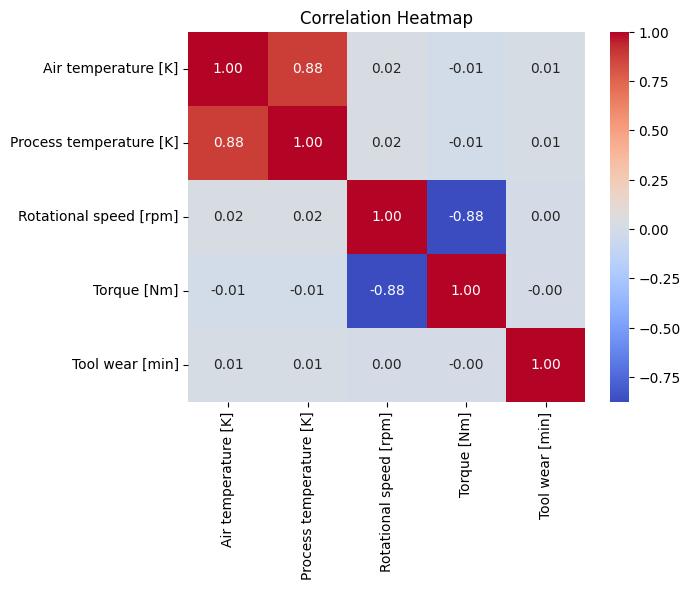

In [12]:
# Correlation Heatmap
corr = df[numerical_columns].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

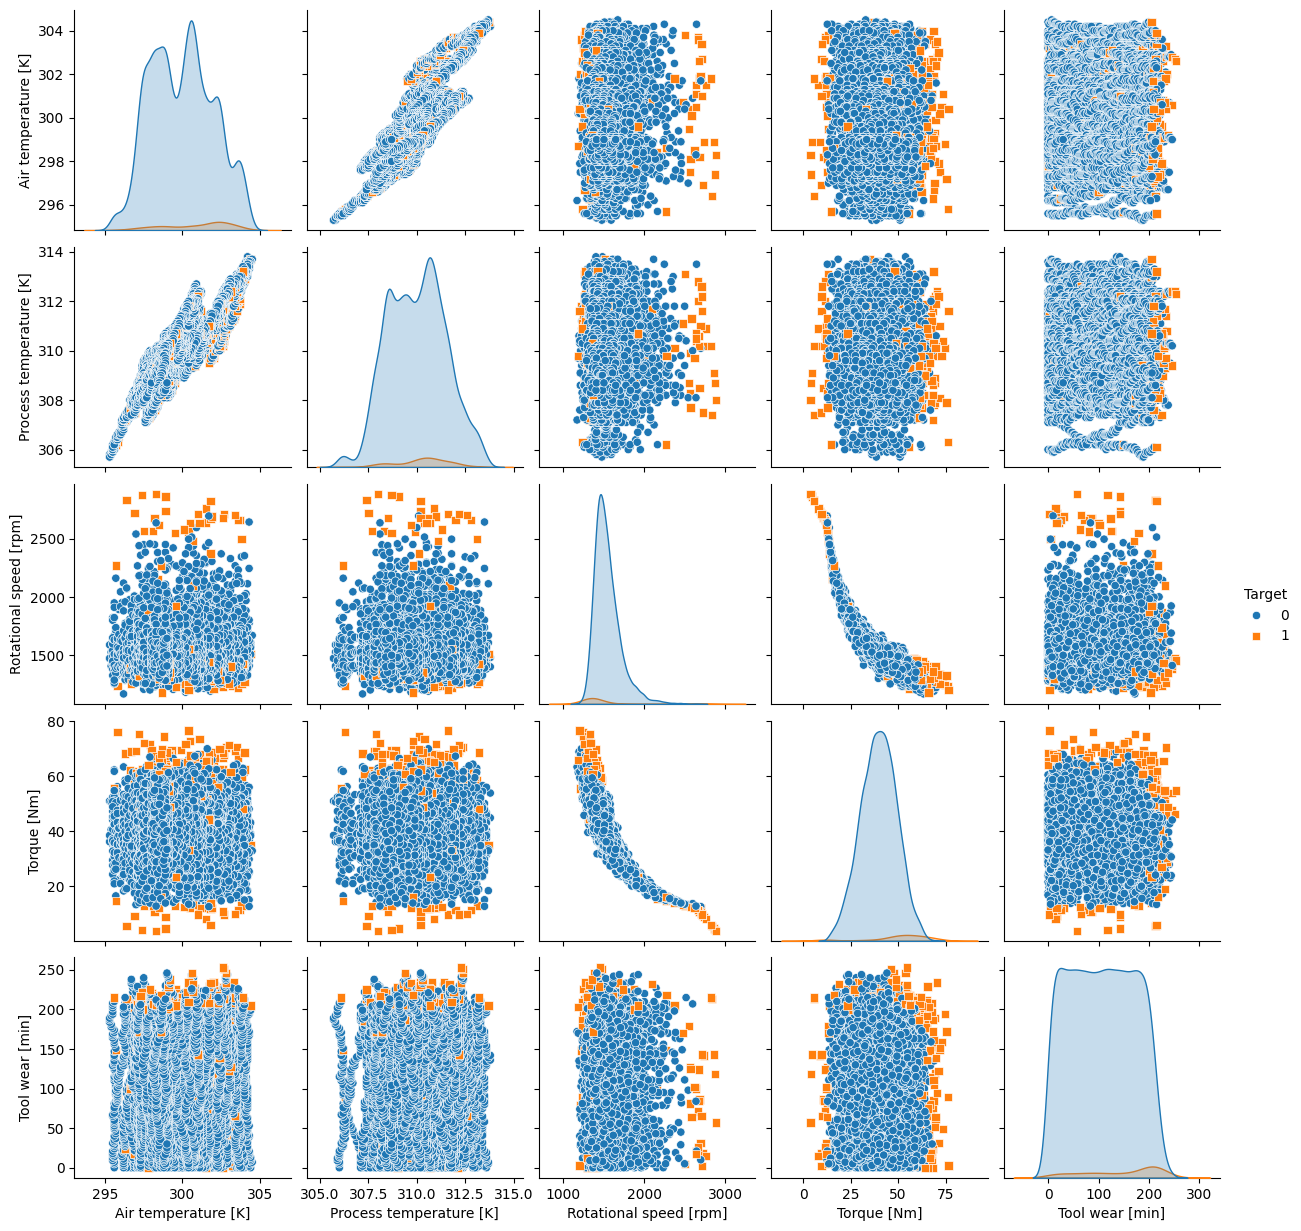

In [13]:
# Pairplot to analyze relationships between features and the target
sns.pairplot(df[numerical_columns + ['Target']], hue='Target', markers=["o", "s"])
plt.show()

### Feature Engineering

In [14]:
# Creating Rolling Features
df['air_temp_rolling_mean'] = df['Air temperature [K]'].rolling(window=5).mean()
df['torque_rolling_mean'] = df['Torque [Nm]'].rolling(window=5).mean()
df['process_temp_rolling_mean'] = df['Process temperature [K]'].rolling(window=5).mean()
df['rotational_speed_rolling_mean'] = df['Rotational speed [rpm]'].rolling(window=5).mean()

In [15]:
# Creating Interaction Features
df['temp_interaction'] = df['Air temperature [K]'] * df['Process temperature [K]']
df['torque_speed_interaction'] = df['Torque [Nm]'] * df['Rotational speed [rpm]']

In [16]:
# Using rolling window for aggregation
df['air_temp_rolling_max'] = df['Air temperature [K]'].rolling(window=10).max()
df['torque_rolling_max'] = df['Torque [Nm]'].rolling(window=10).max()
df['process_temp_rolling_max'] = df['Process temperature [K]'].rolling(window=10).max()
df['rotational_speed_rolling_max'] = df['Rotational speed [rpm]'].rolling(window=10).max()